<h1>Imports</h1>

<p> `∧__∧</br>
(｀•ω• )づ__∧</br>
  つ　 / ( •ω•。)</br>
しーＪ (nnノ) pat pat</p>

In [1]:
import numpy as np
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf

In [3]:
import keras
keras.__version__

'3.3.3'

In [4]:
%matplotlib inline

In [5]:
import cv2

In [6]:
# adds a progressbar
from tqdm.notebook import tqdm

# set seaborn graphs to a better style
sns.set(style="ticks")

In [7]:
import os, sklearn

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

<h1>Loading data</h1>

In [8]:
data_path = r"C:\Users\tisha\Documents\GitHub\adv_python_project\face_age"

In [9]:
from sklearn.model_selection import train_test_split

def load_images(data_path, img_size=(200, 200), test_size=0.15, random_state=42):
    images = []
    labels = []

    for age_folder in os.listdir(data_path):
        age_path = os.path.join(data_path, age_folder)
        if os.path.isdir(age_path):
            for img_name in os.listdir(age_path):
                img_path = os.path.join(age_path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, img_size)
                    images.append(img)
                    labels.append(int(age_folder))

    images = np.array(images)
    labels = np.array(labels)
    images = images / 255.0

    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

<h1>Processing data</h1>

In [10]:
X_train, X_test, y_train, y_test = load_images(data_path)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (8311, 200, 200, 3)
X_test shape: (1467, 200, 200, 3)
y_train shape: (8311,)
y_test shape: (1467,)


In [25]:
print(f"Sample y_train labels: {y_train[:10]}")
print(f"Sample y_test labels: {y_test[:10]}")

Sample y_train labels: [68 85 29 67  1  3 29  8 60 90]
Sample y_test labels: [ 8  3  5  1 52 34  1 11  1 34]


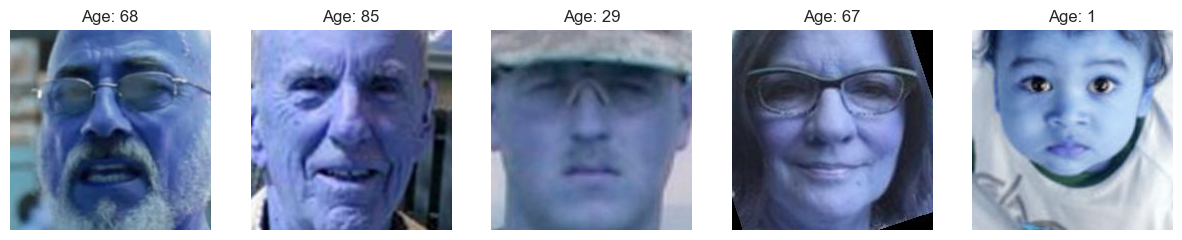

In [26]:
def visualize_samples(X, y, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(X[i])
        plt.title(f"Age: {y[i]}")
        plt.axis('off')
    plt.show()

visualize_samples(X_train, y_train)

<h1>Creating model</h1>

In [18]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(128, activation='swish'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='swish'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

#use mean absolute error insted of accuracy bruh

model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae', 'mape'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 198, 198, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 198, 198, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 99, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 99, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 97, 97, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 97, 97, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,753,569 (6.69 MB)

 Trainable params: 1,753,089 (6.69 MB)

 Non-trainable params: 480 (1.88 KB)

In [25]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# from keras.callbacks import ModelCheckpoint

# stop_early = EarlyStopping(patience = 20, monitor="val_loss")


reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, min_lr=0.0005)

model_checkpoint = ModelCheckpoint(monitor='val_loss', mode='min', filepath=r"C:\Users\tisha\Documents\GitHub\adv_python_project\model_checkpoints\age_model.keras")             


<h1>Training the model</h1>

In [26]:
# callbacks=[stop_early], 

n_epochs = 50
b_size = 128

history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=b_size, validation_split=0.2, callbacks=[reduce_lr, model_checkpoint], verbose=1)

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - loss: 819.6491 - mae: 21.6000 - mape: 318.6991 - val_loss: 784.9692 - val_mae: 21.2620 - val_mape: 250.1889 - learning_rate: 0.0010
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - loss: 353.2736 - mae: 13.7249 - mape: 160.3996 - val_loss: 572.7128 - val_mae: 20.0058 - val_mape: 458.6623 - learning_rate: 0.0010
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - loss: 276.3040 - mae: 11.9706 - mape: 125.7479 - val_loss: 590.0739 - val_mae: 21.0871 - val_mape: 563.1969 - learning_rate: 0.0010
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - loss: 241.8082 - mae: 11.0501 - mape: 107.6723 - val_loss: 583.5582 - val_mae: 20.4513 - val_mape: 525.9769 - learning_rate: 0.0010
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - loss: 233.9071 - mae: 10.8749 - mape: 99.9044 - val_loss: 533.8871 - val_mae: 19.5938 - val_mape: 487.8599 - learning_rate: 0.0010
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - loss: 214.6705 - mae: 1

ValueError: too many values to unpack (expected 2)

In [28]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'mape', 'val_loss', 'val_mae', 'val_mape', 'learning_rate'])


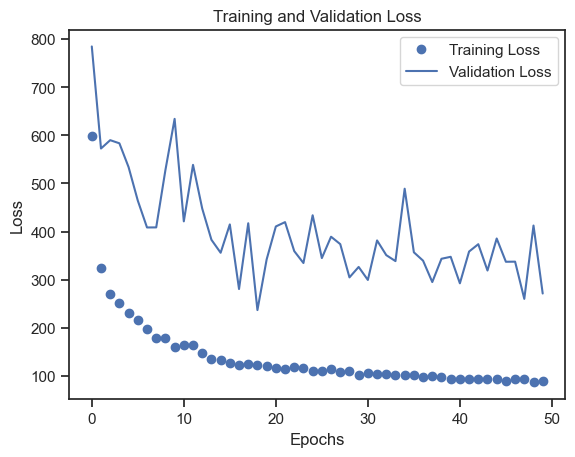

In [27]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(history.epoch, training_loss, 'bo', label='Training Loss')  
plt.plot(history.epoch, validation_loss, 'b', label='Validation Loss')  

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

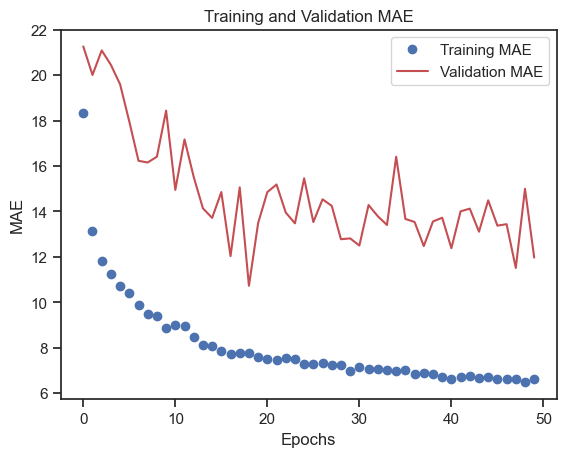

In [33]:
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(history.epoch, mae, 'bo', label='Training MAE')
plt.plot(history.epoch, val_mae, 'r', label='Validation MAE')

plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')

plt.legend()
plt.show()

In [41]:
n_epochs = 50
b_size = 128

reduce_lr_2 = ReduceLROnPlateau(monitor='val_loss', patience=5, min_lr=0.0005)

model_checkpoint_2 = ModelCheckpoint(monitor='val_loss', mode='min', filepath=r"C:\Users\tisha\Documents\GitHub\adv_python_project\model_checkpoints\age_model_2.keras")

history_2 = model.fit(X_train, y_train, epochs=n_epochs, batch_size=b_size, validation_split=0.2, callbacks=[reduce_lr_2, model_checkpoint_2], verbose=1)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - loss: 91.1520 - mae: 6.5956 - mape: 47.2320 - val_loss: 367.3670 - val_mae: 14.0952 - val_mape: 62.9630 - learning_rate: 5.0000e-04
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - loss: 85.4837 - mae: 6.4298 - mape: 46.5929 - val_loss: 361.7341 - val_mae: 13.9369 - val_mape: 59.5994 - learning_rate: 5.0000e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - loss: 86.7857 - mae: 6.4054 - mape: 46.4337 - val_loss: 316.1961 - val_mae: 12.9470 - val_mape: 62.3046 - learning_rate: 5.0000e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - loss: 89.2554 - mae: 6.5335 - mape: 50.2341 - val_loss: 315.3176 - val_mae: 13.0366 - val_mape: 60.1074 - learning_rate: 5.0000e-04
Epoch 5/50
30/52 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - loss: 87.4704 - mae: 6.3475 - mape: 49.8331

KeyboardInterrupt: 

<h1>Creating and Training the model 2 simplified (thats crap)</h1>

In [18]:
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D((2, 2)))

model_2.add(Conv2D(64, (5, 5), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D((2, 2)))

model_2.add(Conv2D(128, (3, 3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(AveragePooling2D((2, 2)))

model_2.add(GlobalAveragePooling2D())

model_2.add(Dense(64, activation='swish'))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation='linear'))

#use mean absolute error insted of accuracy bruh

model_2.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae', 'mape'])

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 198, 198, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 95, 95, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 95, 95, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 45, 45, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 135,233 (528.25 KB)

 Trainable params: 134,785 (526.50 KB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# from keras.callbacks import ModelCheckpoint

# stop_early = EarlyStopping(patience = 20, monitor="val_loss")

reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, min_lr=0.0005)

model_checkpoint = ModelCheckpoint(monitor='val_loss', mode='min', filepath=r"C:\Users\tisha\Documents\GitHub\adv_python_project\model_checkpoints\age_model_simple.keras")

In [20]:
# callbacks=[stop_early], 

n_epochs = 10
b_size = 128

history_2 = model_2.fit(X_train, y_train, epochs=n_epochs, batch_size=b_size, validation_split=0.2, callbacks=[reduce_lr, model_checkpoint], verbose=1)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 251s 5s/step - loss: 1309.8937 - mae: 27.1423 - mape: 109.8941 - val_loss: 1207.3496 - val_mae: 25.6712 - val_mape: 96.0821 - learning_rate: 0.0010
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - loss: 773.5739 - mae: 21.1059 - mape: 260.3753 - val_loss: 780.3011 - val_mae: 20.5181 - val_mape: 186.4266 - learning_rate: 0.0010
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - loss: 493.8713 - mae: 17.2672 - mape: 280.2199 - val_loss: 954.6431 - val_mae: 22.9463 - val_mape: 155.4205 - learning_rate: 0.0010
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - loss: 418.9973 - mae: 15.9947 - mape: 268.6617 - val_loss: 1720.1732 - val_mae: 33.6861 - val_mape: 259.5923 - learning_rate: 0.0010
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 224s 4s/step - loss: 371.1016 - mae: 14.6340 - mape: 233.4458 - val_loss: 1646.1996 - val_mae: 33.0154 - val_mape: 288.6586 - learning_rate: 0.0010
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 223s 4s/step - loss: 354.6777 - ma

<h1>Testing the model</h1>

In [21]:
image_path = r"C:\Users\tisha\Documents\GitHub\adv_python_project\test.jpg"
img = cv2.imread(image_path)  
img = cv2.resize(img, (200, 200))  
img = img.astype('float32') / 255.0  


img = np.expand_dims(img, axis=0)

# Check the shape
print('Image shape:', img.shape)

Image shape: (1, 200, 200, 3)


In [34]:
predicted_age = model.predict(img)

print('Predicted age:', predicted_age[0][0])

NameError: name 'model' is not defined

In [29]:
from keras.models import load_model

model_load_path = r"C:\Users\tisha\Documents\GitHub\adv_python_project\model_checkpoints\age_model.keras"

loaded_model = load_model(model_load_path)

evaluation_metrics = loaded_model.evaluate(X_test, y_test, verbose=1)

loss, mae, mape = evaluation_metrics
print(f"Model Evaluation:\n- Loss (Mean Squared Error): {loss:.4f}\n- Mean Absolute Error (MAE): {mae:.4f}\n- Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 277.5140 - mae: 11.9713 - mape: 56.8538
Model Evaluation:
- Loss (Mean Squared Error): 283.3416
- Mean Absolute Error (MAE): 12.1997
- Mean Absolute Percentage Error (MAPE): 57.47%


In [33]:
predictions = loaded_model.predict(X_test)
# print(predictions)

rounded_predictions = np.round(predictions).astype(int)

print(f"Rounded Predictions:\n{rounded_predictions[:10]}")
print(f"Actual Ages:\n{y_test[:10]}")

tolerance = 5

absolute_errors = np.abs(rounded_predictions.flatten() - y_test)

within_tolerance = (absolute_errors <= tolerance).sum()

accuracy_within_tolerance = within_tolerance / y_test.shape[0] * 100

print(f"Accuracy (within {tolerance} years): {accuracy_within_tolerance:.2f}%")

46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step
Rounded Predictions:
[[ 8]
 [ 5]
 [ 2]
 [ 2]
 [28]
 [16]
 [ 2]
 [ 7]
 [ 6]
 [19]]
Actual Ages:
[ 8  3  5  1 52 34  1 11  1 34]
Accuracy (within 5 years): 39.47%


<p style="text-align: center">
░░░░░░░░░░░░░▄▄▄▄▄▄▄░░░░░░░░░</br>
░░░░░░░░░▄▀▀▀░░░░░░░▀▄░░░░░░░</br>
░░░░░░░▄▀░░░░░░░░░░░░▀▄░░░░░░</br>
░░░░░░▄▀░░░░░░░░░░▄▀▀▄▀▄░░░░░</br>
░░░░▄▀░░░░░░░░░░▄▀░░██▄▀▄░░░░</br>
░░░▄▀░░▄▀▀▀▄░░░░█░░░▀▀░█▀▄░░░</br>
░░░█░░█▄░░░░█░░░▀▄░░░░░▐░█░░░</br>
░░▐▌░░█▀░░░▄▀░░░░░▀▄▄▄▄▀░░█░░</br>
░░▐▌░░█░░░▄▀░░░░░░░░░░░░░░█░░</br>
░░▐▌░░░▀▀▀░░░░░░░░░░░░░░░░▐▌░</br>
░░▐▌░░░░░░░░░░░░░░░▄░░░░░░▐▌░</br>
░░▐▌░░░░░░░░░▄░░░░░█░░░░░░▐▌░</br>
░░░█░░░░░░░░░▀█▄░░▄█░░░░░░▐▌░</br>
░░░▐▌░░░░░░░░░░▀▀▀▀░░░░░░░▐▌░</br>
░░░░█░░░░░░░░░░░░░░░░░░░░░█░░</br>
░░░░▐▌▀▄░░░░░░░░░░░░░░░░░▐▌░░</br>
░░░░░█░░▀░░░░░░░░░░░░░░░░▀░░░</br>
╦═╗╔═╗╔══║░║╔═╗░░╦═╗╦░╦═╗░░╦░</br>
║░║╠═╣╠═░║░║║░║░░║░║║░║░║░░║░</br>
╩═╝║░║║░░╚═╝╩╩╝░░╩═╝╩░╩═╝░░╩░</br>
═╦║░║╔═╗═╦═░░╔═╗╔═╗╔═╗╦═╗░╔═╗</br>
░║║░║╚═╗░║░░░╠╦╝╠╣░╠═╣║░║░░╔╝</br>
╚╝╚═╝╚═╝░║░░░║╚═╚═╝║░║╩═╝░░▄░</br>

bruh
</p>